In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [2]:
years = range(2002, 2016 + 1)
births = pd.DataFrame()

more_than_2 = [*[str(i) for i in range(2, 9 + 1)], '10 i dalsze']

for year in years:
    df = pd.read_csv(f'datasets/births/regions_pl_uro_{year}_00_2p.csv')
    df = df.drop('Unnamed: 0', axis=1)
    df['year'] = year
    df['2+'] = df[more_than_2].sum(axis=1)
    df.region = df.region.str.strip()
    
    births = births.append(df, True)

display(births.head())
display(births.tail())

region    total        1       2       3       4      5    6  \
0        DOLNOŚLĄSKIE  24588.0  12684.0  7543.0  2620.0   904.0  418.0  198   
1  KUJAWSKO-POMORSKIE  20238.0  10074.0  6132.0  2253.0   887.0  453.0  196   
2           LUBELSKIE  20908.0   9548.0  6437.0  2691.0  1134.0  512.0  275   
3            LUBUSKIE   9486.0   4730.0  2926.0  1016.0   427.0  193.0   85   
4             ŁÓDZKIE  22258.0  11419.0  7113.0  2325.0   787.0  316.0  160   

     7   8   9  10 i dalsze nieustalona  year       2+  
0  113  48  26           34           -  2002  11904.0  
1  108  65  28           40           2  2002  10162.0  
2  148  81  42           37           3  2002  11357.0  
3   43  37  14           15           -  2002   4756.0  
4   59  34  16           25           4  2002  10835.0

region    total        1        2       3       4      5  \
235              ŚLĄSKIE  42742.0  19926.0  16571.0  4480.0  1112.0  381.0   
236       ŚWIĘTOKRZYSKIE  10610.0   4930.0   4253.0  1054.0   250.0   82.0   
237  WARMIŃSKO-MAZURSKIE  13443.0   5991.0   5129.0  1516.0   482.0  169.0   
238        WIELKOPOLSKIE  38237.0  17799.0  14804.0  4082.0   998.0  340.0   
239   ZACHODNIOPOMORSKIE  15688.0   7184.0   6041.0  1675.0   474.0  162.0   

       6   7   8   9  10 i dalsze nieustalona  year       2+  
235  155  66  22  15           13           1  2016  22815.0  
236   21  10   5   2            3           -  2016   5680.0  
237   81  41  18  10            6           -  2016   7452.0  
238  119  50  28   8            7           2  2016  20436.0  
239   76  38  17  10            9           2  2016   8502.0

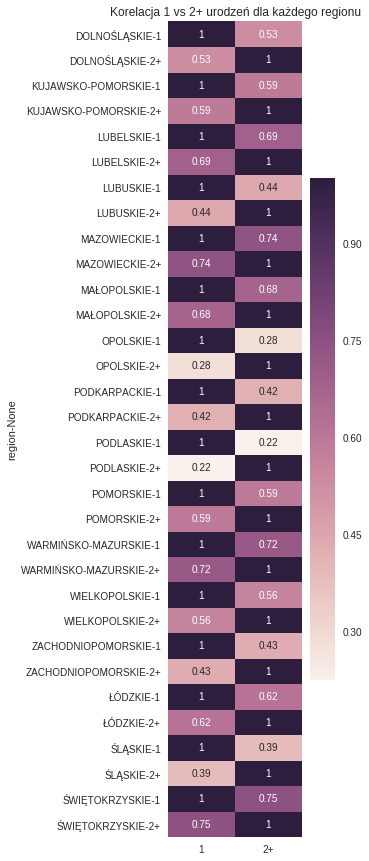

In [8]:
corr = births[['region', '1', '2+']].groupby(births.region).corr()

_, ax = plt.subplots(figsize=(3, 15))
_ = ax.set_title('Korelacja 1 vs 2+ urodzeń dla każdego regionu')
_ = sns.heatmap(corr, annot=True, ax=ax)


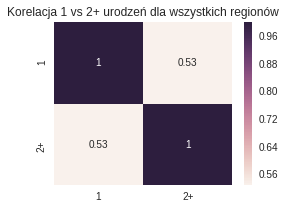

In [4]:
corr = births[['1', '2+']].groupby(births.year).sum().corr()

_, ax = plt.subplots(figsize=(4, 3))
ax = sns.heatmap(corr, annot=True, ax=ax)
_ = ax.set_title('Korelacja 1 vs 2+ urodzeń dla wszystkich regionów')

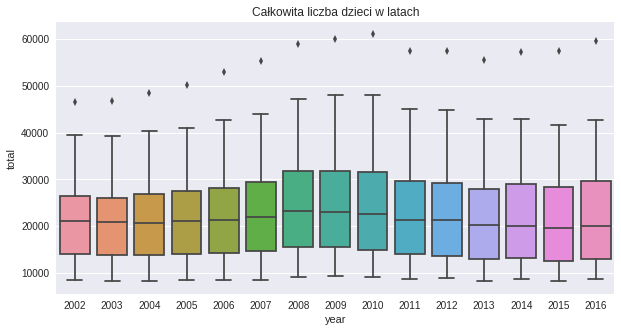

In [48]:
_, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x='year', y='total', data=births, ax=ax)
_ = ax.set_title('Całkowita liczba dzieci w latach')

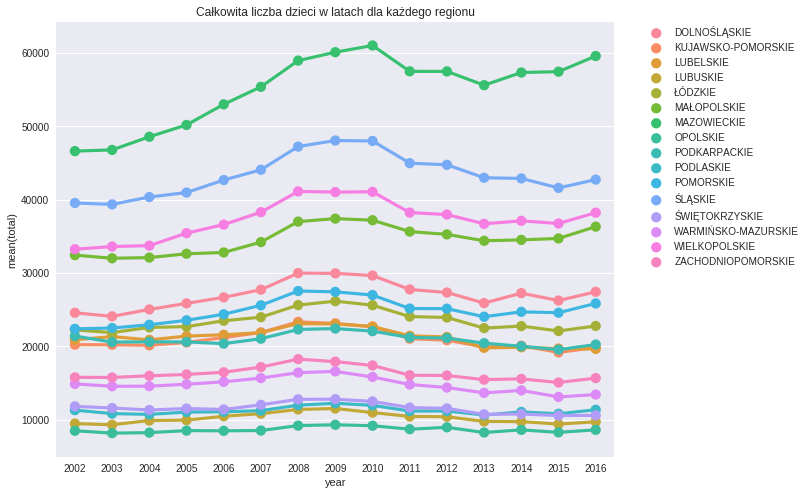

In [62]:
_, ax = plt.subplots(figsize=(10, 8))
sns.pointplot(x='year', y='total', hue='region', data=births, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
_ = ax.set_title('Całkowita liczba dzieci w latach dla każdego regionu')

In [124]:
before_500_plus = births[births.year != 2016]['total'].groupby(births.region).mean()
before_500_plus

region
DOLNOŚLĄSKIE           27016.357143
KUJAWSKO-POMORSKIE     21042.142857
LUBELSKIE              21363.428571
LUBUSKIE               10269.642857
MAZOWIECKIE            54719.928571
MAŁOPOLSKIE            34463.428571
OPOLSKIE                8652.214286
PODKARPACKIE           20995.857143
PODLASKIE              11248.642857
POMORSKIE              24794.214286
WARMIŃSKO-MAZURSKIE    14902.785714
WIELKOPOLSKIE          37217.928571
ZACHODNIOPOMORSKIE     16378.500000
ŁÓDZKIE                23556.000000
ŚLĄSKIE                43401.428571
ŚWIĘTOKRZYSKIE         11658.928571
Name: total, dtype: float64

In [126]:
after_500_plus = births[births.year == 2016].total.values
after_500_plus

array([ 27452.,  19840.,  19666.,   9734.,  22794.,  36331.,  59586.,
         8634.,  20262.,  11373.,  25865.,  42742.,  10610.,  13443.,
        38237.,  15688.])

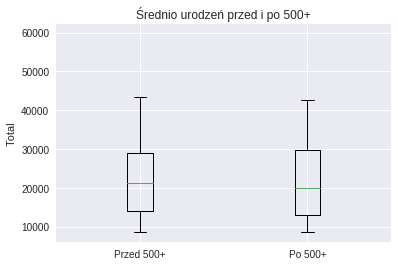

In [130]:
plt.boxplot(x=[before_500_plus, after_500_plus], labels=['Przed 500+', 'Po 500+'])
_ = plt.title('Średnio urodzeń przed i po 500+')
_ = plt.ylabel('Total')

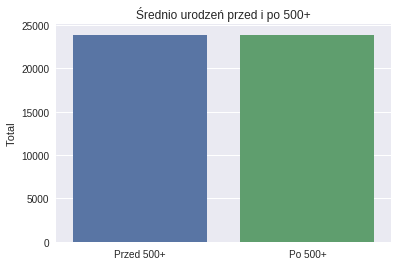

In [128]:
ax = sns.barplot(x=['Przed 500+', 'Po 500+'], y=[before_500_plus.mean(), after_500_plus.mean()])
_ = ax.set_ylabel('Total')
_ = ax.set_title('Średnio urodzeń przed i po 500+')